In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from collections import Counter
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context    
nltk.download('punkt')

from datetime import datetime
from datetime import timedelta

pd.set_option('display.max_colwidth', 800)
pd.set_option('display.max_rows', 10)

[nltk_data] Downloading package punkt to /Users/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [148]:
# import employees_complete.xlsx to dataframe
df = pd.read_excel('employees_complete.xlsx')

In [149]:
# find out how many values are missing for each field
df.eq(" ").sum()

company        0
job_title      0
              ..
posted_date    0
expiry_date    0
Length: 14, dtype: int64

In [150]:
# Check for duplicates in df
print(df.duplicated().sum())

# Remove duplicates in df
df.drop_duplicates(inplace=True)

2


In [151]:
df.describe()

,company,job_title,address,employment_type,seniority,min_experience,job_categories,salary_type,salary_range,job_description,job_skills,applicants,posted_date,expiry_date
count,850,850,850,850,850,850,850,850,850,850,850,850,850,850
unique,393,651,239,21,9,13,146,1,320,784,761,96,30,31
top,THE SUPREME HR ADVISORY PTE. LTD.,Data Engineer,,Full Time,Professional,3 years exp,Information Technology,Monthly,"$7,000to$10,000","HR\nJob description:\n\nSupporting the recruitment administrative duties such as creating and updating job postings on job boards, career page and other media, screening candidates and interview coordination.\nTraining and course arrangement\nAssist the manager in sorting, tabulating, and evaluating data.\nOffice tasks including printing, booking, and other tasks vary based on the work and the WFH setting.\n\n\nWithout prior experience.\nFlexible hours or office hours.\ngood experience for learning.\nHigh JOB PROGRESSION IS AVAILABLE!\nTalented individuals WANTED!!","['Team Worker', 'Headhunting', 'Microsoft Office', 'Microsoft Excel', 'Financial Transactions', 'Administration', 'Payroll', 'Accounting', 'Financial Statements', 'Bookkeeping', 'Administrative Support', 'Resource Management', 'Human Resources', 'Microsoft Word', 'Screening']",1 application,Posted 16 Feb 2023,Closing on 10 Mar 2023
freq,37,42,252,237,214,162,323,850,25,14,14,69,61,54


# Heatmap

In [152]:
# # create a heatmap to show the count of job_title_cln and employment_type_cln
# # create a pivot table with counts
# pivot_table = df.pivot_table(index='min_experience', columns='job_title_cln', aggfunc='size')
# pivot_table = pivot_table.sort_index()

# # create a heatmap using seaborn
# sns.heatmap(pivot_table, annot=True, cmap='Blues')

# # show the plot
# plt.show()

# job_title

In [153]:
#create a new column in df and name it 'job_title_cln'
df['job_title_cln'] = ''

#if job_title contains "data analyst", insert "data analyst" into job_title_categories etc.
string = "data anal"
df.loc[df['job_title'].str.contains(string,case=False), 'job_title_cln'] = 'data analyst'
# print the number of data analyst jobs

df.loc[df['job_title'].str.contains('data anla',case=False), 'job_title_cln'] = 'data analyst'
df.loc[df['job_title'].str.contains('data scien',case=False), 'job_title_cln'] = 'data scientist'
df.loc[df['job_title'].str.contains('data model',case=False), 'job_title_cln'] = 'data scientist'
df.loc[df['job_title'].str.contains('machine learning',case=False), 'job_title_cln'] = 'data scientist'
df.loc[df['job_title'].str.contains('ML',case=False), 'job_title_cln'] = 'data scientist'
df.loc[df['job_title'].str.contains('AI',case=False), 'job_title_cln'] = 'data scientist'
df.loc[df['job_title'].str.contains('computer vision',case=False), 'job_title_cln'] = 'data scientist'
df.loc[df['job_title'].str.contains('big data',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('database',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data engineer',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data cent',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data product',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('tech lead',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data platform',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data mgt',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data management',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data ops',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data operations',case=False), 'job_title_cln'] = 'data engineer'
df.loc[df['job_title'].str.contains('data architect',case=False), 'job_title_cln'] = 'data engineer'

# for certain jobs we know that they should belong in others
df.loc[df['job_title'].str.contains('software engineer',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('data migration',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('data entry',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('data processing',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('project manager',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('business analyst',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('delivery manager',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('data protection',case=False), 'job_title_cln'] = 'others'
df.loc[df['job_title'].str.contains('data governance',case=False), 'job_title_cln'] = 'others'

# if job_title_cln is empty, insert "others" into job_title_cln
df.loc[df['job_title_cln'] == '', 'job_title_cln'] = 'others'

# provide a count of the number of data analyst jobs
print(df['job_title_cln'].value_counts())

data engineer     312
others            281
data analyst      152
data scientist    105
Name: job_title_cln, dtype: int64


- We try to use bi-grams to get an overview of the job titles available
- We will try to segment the data jobs scraped into 4 categories: Data Analyst, Data Scientist, Data Engineer and Others

In [154]:

# Use bigrams to drill down and sort the job titles

# if job_list_category is empty, filter it and copy it to a list
sentences = df[df['job_title'].eq('')].job_title.tolist()

# Tokenize the sentences into words
words = [word.lower() for sent in sentences for word in nltk.word_tokenize(sent)]

# Create a list of bigrams
bigrams = nltk.ngrams(words, 2)

# Filter bigrams to only include those containing the word "data"
data_bigrams = [bigram for bigram in bigrams if 'data' in bigram]

# Count the frequency of each bigram
bigram_counts = Counter(data_bigrams)

# Sort the list of bigrams by frequency in descending order
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Print the 10 most popular bigrams
print(sorted_bigrams[:20])


[]


In [155]:
# show full output of job_description that job_title contains "selected_string"
selected_string="database"
print(len(df[df['job_title'].str.contains(selected_string, case=False)].job_description))
print(df[df['job_title'].str.contains(selected_string, case=False)].job_title)
df[df['job_title'].str.contains(selected_string, case=False)].job_description

3
660    Technical Lead (Data Platform & ETL - Microsoft Database)
714                        Data Modeling SQL Database (Contract)
778              Tech Lead (Distributed Database), Data Platform
Name: job_title, dtype: object


660    The candidate is responsible to design, implement and maintain ETL solutions and data models in the data platform, he/she will manage vendors to develop the ETL packages and transformation scripts, review the codes, scripts and test results.\n\nPerform impact analysis for upstream and downstream changes that affect the systems\nDesign, develop and implement high quality ETL solutions, transformations and reports using Microsoft SQL Server tools\nDeliver project or enhancement requests, create/update SDLC documents including functional and non-functional specifications, technical design documents, test plan, test cases, release procedures, system operational documents, user manuals, etc\nManage vendors on daily development works, review and signoff results delivered by vendors by follow...
714                                             Job Description & Requirements\nContract position: 12 months contract\nLocated in Bayfront Ave/Harbourfront Centre\n\nJob Description:\nBusiness 

# employment_type


In [156]:
df.employment_type.value_counts()

Full Time                                                             237
Permanent, Full Time                                                  204
                                                                     ... 
Part Time, Full Time                                                    1
Flexi-work, Full Time, Internship/Attachment, Part Time, Permanent      1
Name: employment_type, Length: 21, dtype: int64

In [157]:
# we can categorise the time commitment into full time, part time


# if full time employment is available we will assume that it is full time employment

# create a new column called time_commitment and assign values
df['time_commitment'] = df['employment_type'].apply(lambda x: 'part time' if 'part time' in x.lower() else 'full time')

print(df.time_commitment.value_counts())

# Since there are only 8 part timers we can drop this column
df.drop('time_commitment', axis=1, inplace=True)

full time    842
part time      8
Name: time_commitment, dtype: int64


In [158]:
# we can also categorise the contract type into permanent, contract, intership

# first we segregate out all the intership job listings
# if the remaining data contains permanent we will assume that it is permanent
# if the data contains only full time or part time we will assume that it is permanent
# everything else will be considered contract

df['employment_type_cln'] = df['employment_type'].apply(lambda x: 
                                         'internship' if 'intern' in x.lower() 
                                         else ('permanent' if ('permanent' in x.lower()) or (x.lower()=='full time') or (x.lower()=='part time')
                                         or (x.lower()=='part time, full time')
                                               else 'contract'))


df.employment_type_cln.value_counts()

permanent     639
contract      204
internship      7
Name: employment_type_cln, dtype: int64

# seniority

In [159]:
df.seniority.value_counts()

Professional         214
Executive            160
                    ... 
Middle Management     26
Senior Management     23
Name: seniority, Length: 9, dtype: int64

# min_experience

In [160]:
df.min_experience.value_counts()

3 years exp     162
1 year exp      146
               ... 
12 years exp      5
9 years exp       1
Name: min_experience, Length: 13, dtype: int64

In [161]:
# use regex to just extract the number from the min_experience column
df['min_experience'] = df['min_experience'].str.extract('(\d+)')
df.min_experience.value_counts()

3     162
1     146
     ... 
12      5
9       1
Name: min_experience, Length: 12, dtype: int64

In [162]:
# fill in NaN values with 0
df['min_experience'] = df['min_experience'].fillna(0)
# convert min_experience to int
df['min_experience'] = df['min_experience'].astype(int)

# job_categories

In [163]:
df.job_categories.value_counts()

Information Technology                                                           323
Engineering                                                                       56
                                                                                ... 
Admin / Secretarial, Healthcare / Pharmaceutical, Sciences / Laboratory / R&D      1
Accounting / Auditing / Taxation, Admin / Secretarial                              1
Name: job_categories, Length: 146, dtype: int64

In [164]:
# create new columns for each category
category_names = set(category for row in df['job_categories'] for category in re.split('[,/]', row))
category_columns = ['Industry_' + name.strip() for name in category_names]
df[category_columns] = pd.DataFrame([[0] * len(category_columns)], index=df.index)

# set new columns to 1 where appropriate
df[category_columns] = df.apply(lambda row: pd.Series([1 if name.strip() in re.split('[,/]', row['job_categories']) else 0 for name in category_names]), axis=1)

# # drop original column
# df = df.drop('job_categories', axis=1)

# salary_type

In [165]:
df.salary_type.value_counts()

Monthly    850
Name: salary_type, dtype: int64

# salary_range

In [166]:
df.salary_range.value_counts()

$7,000to$10,000     25
$2,000to$6,000      16
                    ..
$12,000to$16,000     1
$3,000to$4,200       1
Name: salary_range, Length: 320, dtype: int64

1        4
9        1
12       2
400      1
750      1
        ..
14600    1
15000    4
16000    2
20000    3
20800    1
Name: salary_min, Length: 87, dtype: int64

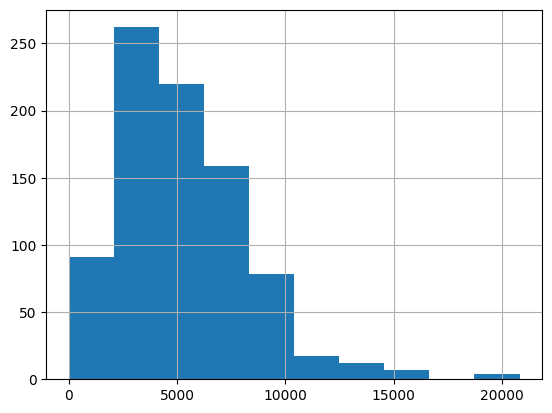

In [167]:
# use regex to extract the 7,000 from $7,000to$10,000
df['salary_min'] = df['salary_range'].str.extract(r'\$(\d{1,3}(,\d{3})?)to\$(\d{1,3}(,\d{3})?)', expand=False)[0]

# replace commas with nothing
df['salary_min'] = df['salary_min'].str.replace(',', '')

# convert salary_min to int
df['salary_min'] = df['salary_min'].astype(int)

# plot histogram of salary_min
df['salary_min'].hist()

pd.set_option('display.max_rows', 10)
df.salary_min.value_counts()
df.salary_min.value_counts().sort_index()

In [168]:
# investigate the job listings with salary_min < 1000
df[df['salary_min'] < 1000]

# most of the job listings are actually temp listings with a few that are refusing to put the salary range
# dropping these rows will be inconsequential
df = df[df['salary_min'] >= 1000]

1030     2
1200     1
1500     1
1600     3
1700     1
        ..
26000    1
28000    1
30000    1
39000    1
45000    1
Name: salary_max, Length: 104, dtype: int64

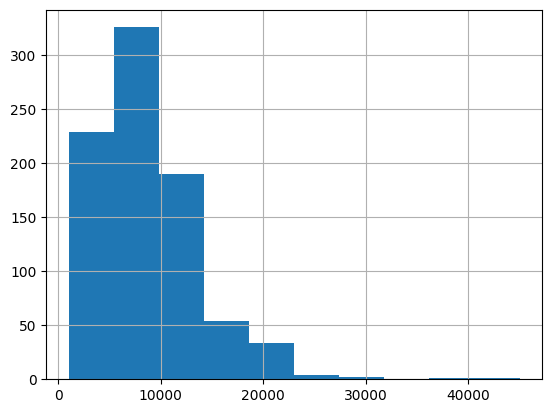

In [169]:
# use regex to extract the 7,000 from $7,000to$10,000
df['salary_max'] = df['salary_range'].str.extract(r'to\$(\d{1,3}(?:,\d{3})?)', expand=True)[0]

# replace commas with nothing
df['salary_max'] = df['salary_max'].str.replace(',', '')

# convert salary_max to int
df['salary_max'] = df['salary_max'].astype(int)

# plot histogram of salary_max
df['salary_max'].hist()

pd.set_option('display.max_rows', 10)
df.salary_max.value_counts().sort_index()

# applicants

In [170]:
df.applicants.value_counts()

1 application       68
2 applications      65
0 application       62
3 applications      57
4 applications      50
                    ..
50 applications      1
93 applications      1
99 applications      1
128 applications     1
59 applications      1
Name: applicants, Length: 95, dtype: int64

In [171]:
# extract the digit value from applicants
df['applicants'] = df['applicants'].str.extract('(\d+)')
# convert to int
df['applicants'] = df['applicants'].astype(int)
df.applicants.value_counts().sort_index()

0      62
1      68
2      65
3      57
4      50
       ..
211     1
216     1
231     1
245     2
266     1
Name: applicants, Length: 95, dtype: int64

# posted_date


In [172]:
df.posted_date.value_counts()

Posted 16 Feb 2023    58
Posted 09 Feb 2023    57
Posted 08 Feb 2023    54
Posted 10 Feb 2023    49
Posted 07 Feb 2023    45
                      ..
Posted 12 Feb 2023     5
Posted 28 Jan 2023     5
Posted 18 Feb 2023     4
Posted 23 Feb 2023     2
Posted 29 Jan 2023     1
Name: posted_date, Length: 30, dtype: int64

In [173]:
# # extract date from posted_date
# date_format = 'Posted %d %b %Y'

# Define function to extract date from string
def extract_date(posted_date):
    date_obj = datetime.strptime(posted_date[7:], "%d %b %Y")
    return date_obj

# Apply function to each row of the column
df['posted_date'] = df['posted_date'].apply(extract_date)

df.posted_date.value_counts()


2023-02-16    58
2023-02-09    57
2023-02-08    54
2023-02-10    49
2023-02-07    45
              ..
2023-02-12     5
2023-01-28     5
2023-02-18     4
2023-02-23     2
2023-01-29     1
Name: posted_date, Length: 30, dtype: int64

# expiry_date


In [174]:
# extract date from posted_date
# date_format = 'Posted %d %b %Y'

# Define function to extract date from string
def extract_date(expiry_date):
    date_obj = datetime.strptime(expiry_date[11:], "%d %b %Y")
    return date_obj

# Apply function to each row of the column
df['expiry_date'] = df['expiry_date'].apply(extract_date)

df.expiry_date.value_counts()

2023-03-10    53
2023-03-02    50
2023-03-11    49
2023-03-18    49
2023-03-08    47
              ..
2023-03-14     5
2023-03-06     5
2023-02-28     5
2023-03-20     4
2023-03-25     2
Name: expiry_date, Length: 31, dtype: int64

In [183]:
# create a new feature called posting_length
df['posting_length'] = df['expiry_date'] - df['posted_date']
df.posting_length.value_counts()

# investigate the job listings with posting_length < 0


30 days     760
14 days      48
21 days      17
-6 days       7
10 days       6
-13 days      2
7 days        1
Name: posting_length, dtype: int64

In [185]:
# extract to excel to analyse in tableau
df.to_excel('to_tableau.xlsx', index=False)

# unfinished

# address

# company

In [175]:
# from fuzzywuzzy import fuzz

# # create a function to calculate similarity score
# def similarity_score(a, b):
#     return fuzz.token_sort_ratio(a, b)

# # create a matrix of similarity scores
# similarity_matrix = pd.DataFrame([[similarity_score(x, y) for x in df['company']] for y in df['company']], index=df['company'], columns=df['company'])

# # plot the heatmap
# sns.heatmap(similarity_matrix, cmap='Reds', annot=True, fmt=".1f")

# # show the plot
# plt.show()

# # sort the matrix by similarity score
# similarity_matrix = similarity_matrix.stack().reset_index()
# similarity_matrix.columns = ['Company1', 'Company2', 'SimilarityScore']
# similarity_matrix = similarity_matrix[similarity_matrix['Company1'] < similarity_matrix['Company2']]
# similarity_matrix = similarity_matrix.sort_values('SimilarityScore', ascending=False)

# # print the top 5 most similar pairs of company names
# print(similarity_matrix.head())

# job description

# job skills